# Data Loader Agents <a id="make-a-data-cleaning-agent"></a>

Most of the time, we need to load data from different sources and formats. This is a very common task in data science projects. In this notebook, we will create a data loader agent that can load data from different sources and formats. This agent specializes in loading:

- CSV files
- Excel files
- Parquet files
- Pickle files
- And more...

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [Load Libraries](#load-libraries)
2. [Setup AI](#setup)
3. [Create The Agent](#create-the-agent)
4. [Usage](#usage)
    1. [Example 1: What tools do you have access to? Return a table.](#example-1-what-tools-do-you-have-access-to-return-a-table)
    2. [Example 2: What folders and files are available?](#example-2-what-folders-and-files-are-available)
    3. [Example 3: What is in the data folder?](#example-3-what-is-in-the-data-folder)
    4. [Example 4: Let's load the bike sales data from the CSV file.](#example-4-lets-load-the-bike-sales-data-from-the-csv-file)
    5. [Example 5: What folders and files are available in my Documents directory?](#example-5-what-folders-and-files-are-available-in-my-documents-directory)
    6. [Example 6: Search for 'csv' files recursively in my current working directory.](#example-6-search-for-csv-files-recursively-in-my-current-working-directory)

### Load Libraries <a id="load-libraries"></a>

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import pandas as pd
import os
import yaml

from ai_data_science_team.agents import DataLoaderToolsAgent

### Setup AI <a id="setup"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model="gpt-4o-mini")
llm


ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x14f704940>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x14fe66f50>, root_client=<openai.OpenAI object at 0x14f707bb0>, root_async_client=<openai.AsyncOpenAI object at 0x14fe66e90>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

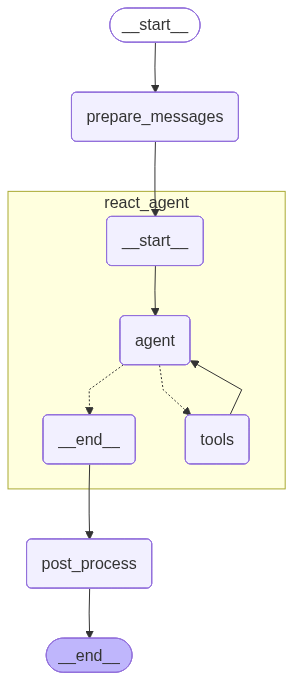

In [3]:
# Make a data loader agent
data_loader_agent = DataLoaderToolsAgent(
    llm, 
    invoke_react_agent_kwargs={"recursion_limit": 10},
)

data_loader_agent.show(xray=1)

## Usage

Here are several examples of how to use the agent:


#### Example 1: What tools do you have access to? Return a table.

In [4]:
# What tools do you have access to? Return a table.
data_loader_agent.invoke_agent("What tools do you have access to? Return a table.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS


Here’s a table summarizing the tools I have access to:

| Tool Name                   | Description                                                                                      |
|-----------------------------|--------------------------------------------------------------------------------------------------|
| `load_directory`            | Loads all recognized tabular files in a directory.                                             |
| `load_file`                 | Automatically loads a file based on its extension.                                             |
| `list_directory_contents`    | Lists all files and folders in the specified directory.                                        |
| `list_directory_recursive`   | Recursively lists all files and folders within a specified directory.                          |
| `get_file_info`            | Retrieves metadata (size, modification time, etc.) about a file.                               |
| `search_files_by_pattern`    | Searches for files that match a given wildcard pattern in a directory.                          |

If you need any specific information or functionality from these tools, feel free to ask!

#### Example 2: What folders and files are available?

**Important note about searching directories:** The agent will by default look for files and folders in your current working directory. However you can change this behavior by prompting the agent to look in a different folder (e.g. Documents, Downloads, etc.).

In [5]:
# What folders and files are available?
data_loader_agent.invoke_agent("What folders and files are available at the root of my directory? Return the file folder structure as code formatted block with the root path at the top and just the top-level folders and files.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: list_directory_contents | /Users/mdancho/Desktop/course_code/ai-data-science-team
    * POST-PROCESS RESULTS
    * Tool: list_directory_contents


Here's the folder and file structure at the root of your directory:

```
/Users/mdancho/Desktop/course_code/ai-data-science-team
├── reports
├── apps
├── data
├── h2o_models
├── build
├── ai_data_science_team
├── examples
├── logs
├── ai_data_science_team.egg-info
├── setup.py
├── img
├── README.md
├── mlruns
├── MANIFEST.in
├── planning_docs
├── dist
├── workflow.drawio
├── requirements.txt
├── LICENSE
├── environment_ds4b_301p_dev.yml
└── temp
```


Many of the tools return artifacts. We can access them as follows:

In [6]:
data_loader_agent.get_artifacts(as_dataframe=True)

,filename,type
0,reports,directory
1,apps,directory
2,data,directory
3,h2o_models,directory
4,build,directory
5,ai_data_science_team,directory
6,examples,directory
7,logs,directory
8,ai_data_science_team.egg-info,directory
9,setup.py,file


#### Example 3: What is in the data folder?

In [7]:
# What is in the data folder?
data_loader_agent.invoke_agent("What is in the data folder? Return a table. Include a description of each file.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: list_directory_contents | /Users/mdancho/Desktop/course_code/ai-data-science-team
    * Tool: list_directory_contents | /Users/mdancho/Desktop/course_code/ai-data-science-team/data
    * Tool: get_file_info | /Users/mdancho/Desktop/course_code/ai-data-science-team/data/northwind.db
    * Tool: get_file_info | /Users/mdancho/Desktop/course_code/ai-data-science-team/data/dirty_dataset.csv
    * Tool: get_file_info | /Users/mdancho/Desktop/course_code/ai-data-science-team/data/churn_data.csv
    * Tool: get_file_info | /Users/mdancho/Desktop/course_code/ai-data-science-team/data/bike_sales_data.csv
    * POST-PROCESS RESULTS
    * Tool: list_directory_contents
    * Tool: list_directory_contents
    * Tool: get_file_info
    * Tool: get_file_info
    * Tool: get_file_info
    * Tool: get_file_info


Here's the table detailing the contents of the **data** folder:

| File Name               | Description                                                                | Size (bytes) | Last Modified           |
|-------------------------|----------------------------------------------------------------------------|--------------|-------------------------|
| northwind.db            | A database file containing the Northwind dataset, often used in tutorials. | 24,702,976   | Thu Jan 2 12:04:15 2025 |
| dirty_dataset.csv       | A small dataset (dirty) likely containing various data quality issues.      | 350          | Sat Dec 14 14:20:00 2024 |
| churn_data.csv          | Dataset used for analyzing customer churn, with attributes for customers.  | 977,501      | Wed Dec 11 10:41:47 2024 |
| bike_sales_data.csv     | Dataset containing sales data related to bikes.                             | 509,205      | Thu Jan 2 15:36:07 2025 |

This table lists the files present in the **data** folder along with their sizes and last modified dates.

#### Example 4: Let's load the bike sales data from the CSV file.

In [8]:
# Load the bike_sales_data.csv file from the data folder.
data_loader_agent.invoke_agent("Load the bike_sales_data.csv file from the data folder.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: load_file | /Users/mdancho/Desktop/course_code/ai-data-science-team/data/bike_sales_data.csv
    * POST-PROCESS RESULTS
    * Tool: load_file


The bike sales data has been successfully loaded from the file. If you need to perform any specific analyses or queries on this data, feel free to let me know!

To extract the data from the artifact, we can use the following code:

In [9]:
data_loader_agent.get_artifacts(as_dataframe=True)

,date,bike_model,price,quantity_sold,extended_sales
0,2021-01-01,Commuter Swift,495,23,11385
1,2021-01-01,Urban Rider,350,19,6650
2,2021-01-01,City Cruiser,400,19,7600
3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...
4995,2022-07-10,Commuter Swift,495,21,10395
4996,2022-07-10,Urban Rider,350,20,7000
4997,2022-07-10,City Cruiser,400,40,16000
4998,2022-07-10,Mountain Trail Pro,1250,9,11250


#### Example 5: What folders and files are available in my Documents directory?

Now we'll switch things up and look at a directory that is outside of my current working directory. 

In [10]:
# What folders and files are available in my Documents directory?
data_loader_agent.invoke_agent("What folders and files are available in my Desktop/learning_labs directory? Do not return recursive results.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: list_directory_contents | /Users/mdancho/Desktop/learning_labs
    * POST-PROCESS RESULTS
    * Tool: list_directory_contents


In the `/Users/mdancho/Desktop/learning_labs` directory, the following folders and files are available:

### Folders:
1. lab_88_price_optimization_ml_r
2. lab_53_modeltime_gluonts_saturn_cloud
3. lab_52_stacks
4. lab_49_feature_engineering
5. lab_19_network_analysis
6. lab_40_docker
7. lab_84_chatgpt_langchain
8. lab_85_cashflow_forecasting
9. finance_machine_learning
10. lab_87_price_optimization_python
11. lab_12_r_programming_rlang
12. plumber_api
13. lab_72_nlp_r
14. lab_39_shiny_app_bonus
15. lab_76_geospatial_r
16. lab_89_causal_inference_in_r
17. lab_37_python_nlp
18. lab_93_bayesian_mmm
19. time_series_data_visualizations
20. ML_Time_Series_Classification_Trading_Strategy
21. lab_26_machine_learning_customer_journey
22. lab_16_promo
23. nowcasting_data
24. lab_48_nlp_textrecipes
25. covid_forecasting
26. lab_44_shiny_powerpoint_automation
27. lab_65_sparklyr
28. lab_39_mlflow
29. lab_58_cust_lifetime_r
30. lab_29_quandl_energy
31. lab_73_timeseries
32. lab_83_chatgpt_2
33. nus_presentation
34. lab_14_promo
35. lab_18_time_series_anomaly_detection
36. lab_69_risk_analysis_py
37. lab_66_pyspark
38. lab_22_sql_advanced - llpro 2
39. lab_63_nested_modeltime
40. intro_to_parsnip
41. lab_21_SQL_for_datascience
42. lab_80_shiny_py
43. h2o_workshop
44. lab_35_finance_deep_learning
45. lab_33_python_HR
46. lab_60_modeltime_ecosystem
47. webinar_introducing_pytimetk
48. lab_56_targets_churn
49. lab_31_shiny_google_analytics
50. lab_64_sktime
51. lab_15_promo
52. lab_79_shiny_p2
53. lab_38_modeltime
54. lab_11_market_basket_analysis
55. causal_inference_r_workshop
56. lab_94_sales_forecast_python
57. lab_76_geospatial_in_r
58. lab_90_causal_inference_python
59. lab_74_bayesian
60. lab_45_shiny_golem
61. lab_78_shiny_part1
62. lab_17_anomaly_detection_h2o
63. lab_16_r_optimization_modeling_2
64. lab_27_google_trends
65. lab_92_customer_lifetime_value_r
66. lab_61_mmm_robyn
67. lab_68_risk_analysis
68. lab_34_python_ecommerce
69. lab_41_metaflow
70. lab_96_macroeconomic_forecasts
71. lab_13_mortgage_loans_datatable
72. lab_47_modeltime_recursive
73. lab_09_finance_with_r_tidyquant
74. lab_36_tensorflow_energy
75. lab_57_targets_modeltime
76. lab_79_shiny_ui_editor
77. lab_71_nlp_py_survey
78. lab_81_modeltime_prefect
79. lab_23_bigquery
80. lab_25_marketing_attribution
81. lab_45_prep
82. lab_14_customer_churn_survival_h2o
83. lab_55_workflowsets
84. lab_15_r_optimization_modeling_1
85. lab_05_bike_sharing
86. lab_10_plumber_api
87. lab_22_sql_advanced
88. lab_43_tidyverse_functions
89. lab_51_torch_tabnet
90. lab_24_ab_testing_infer
91. lab_62_mmm_python
92. lab_59_cust_lifetime_py
93. lab_44_package_setup
94. lab_54_modeltime_recursive
95. lab_46_forecasting_at_scale
96. lab_50_lightgbm
97. lab_30_shiny_tidyquant
98. lab_91_customer_lifetime_value_python_2
99. lab_75_bayesian_2
100. lab_77_geospatial_networks
101. lab_42_plumber_api
102. lab_20_explainable_machine_learning
103. lab_95_time_series_py_polars_mlforecast
104. H2O_automl_lab
105. lab_67_spark_modeltime
106. lab_32_twitter_tidytext_shiny
107. lab_82_chatgpt_1
108. lab_28_api_zillow
109. lab_86_customer_segmentation_python
110. big_cashflow_forecasting_project
111. webscraping_cannondale
112. lab_22_sql_advanced - llpro

### Files:
1. my_twitter_token.rds
2. config.yml
3. historical_product_demand.csv
4. learning_labs.Rproj
5. metaflow_aws_config.json
6. 01_real_estate_analysis.R
7. 02_bonus_nowcasting_with_modeltime.R
8. 01_nowcasting_with_modeltime.R

**Total items: 130**

We can also get the artifacts from the agent:

In [12]:
data_loader_agent.get_artifacts(as_dataframe=True)

,filename,type
0,lab_88_price_optimization_ml_r,directory
1,lab_53_modeltime_gluonts_saturn_cloud,directory
2,lab_52_stacks,directory
3,lab_49_feature_engineering,directory
4,lab_19_network_analysis,directory
...,...,...
125,lab_28_api_zillow,directory
126,lab_86_customer_segmentation_python,directory
127,big_cashflow_forecasting_project,directory
128,webscraping_cannondale,directory


#### Example 6: Search for 'csv' files recursively in my current working directory.

In [13]:
# Search for 'csv' files recursively in my current working directory. 
data_loader_agent.invoke_agent("Search for 'csv' files recursively in my current working directory.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: search_files_by_pattern | /Users/mdancho/Desktop/course_code/ai-data-science-team
    * POST-PROCESS RESULTS
    * Tool: search_files_by_pattern


I found 3 CSV files in your current working directory:

1. **bike_sales_data.csv** - located at `/Users/mdancho/Desktop/course_code/ai-data-science-team/data/bike_sales_data.csv`
2. **churn_data.csv** - located at `/Users/mdancho/Desktop/course_code/ai-data-science-team/data/churn_data.csv`
3. **dirty_dataset.csv** - located at `/Users/mdancho/Desktop/course_code/ai-data-science-team/data/dirty_dataset.csv`

We can then load the data from one of the CSV files. 

In [14]:
data_loader_agent.invoke_agent("Load the churn data at path /Users/mdancho/Desktop/course_code/ai-data-science-team/data/churn_data.csv")

data_loader_agent.get_artifacts(as_dataframe=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: load_file | /Users/mdancho/Desktop/course_code/ai-data-science-team/data/churn_data.csv
    * POST-PROCESS RESULTS
    * Tool: load_file


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
4997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
4998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


Or we can load all of the datasets from the CSV files:

In [4]:
data_loader_agent.invoke_agent("Load all csv files in /Users/mdancho/Desktop/course_code/ai-data-science-team/data/.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    * PREPARE MESSAGES
    * RUN REACT TOOL-CALLING AGENT
    * Tool: load_directory | /Users/mdancho/Desktop/course_code/ai-data-science-team/data
    * POST-PROCESS RESULTS
    * Tool: load_directory


I have loaded the following CSV files from the specified directory:

1. **bike_sales_data.csv**
2. **churn_data.csv**
3. **dirty_dataset.csv**

Let me know if you need any further analysis or information on these files!

Let's extract one of the datasets that were loaded:

In [5]:
data_loader_agent.get_artifacts().keys()


dict_keys(['bike_sales_data.csv', 'churn_data.csv', 'dirty_dataset.csv'])

In [6]:
pd.DataFrame(data_loader_agent.get_artifacts()['churn_data.csv'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
4997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
4998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)